# Tarea 3
**( Ejecicio del cuaderno: Mapeos en 1d)**

Claudio Pierard y Miguel Raz

---

**NOTA** Los ejercicios de este capítulo consituyen la tarea 3. Estos ejercicios involucran que ustedes escriban código que debe ejecutarse correctamente para responder las preguntas que se formulan en los ejercicios. El código debe estar correctamente documentada o al menos comentado, y en general se deben definir funciones que realicen cosas concretas.

**Fecha límite de envío inicial del PR:** lunes 12 de septiembre

**Fecha límite de aceptación del PR:** lunes 26 de septiembre

---

In [1]:
using Plots, PlotRecipes, LaTeXStrings
pyplot()

    +(AbstractArray, DataArrays.DataArray) at /Users/claudiopierard/.julia/v0.4/DataArrays/src/operators.jl:276
is ambiguous with: 
    +(WoodburyMatrices.SymWoodbury, AbstractArray{T<:Any, 2}) at /Users/claudiopierard/.julia/v0.4/WoodburyMatrices/src/SymWoodburyMatrices.jl:107.
To fix, define 
    +(WoodburyMatrices.SymWoodbury, DataArrays.DataArray{T<:Any, 2})
before the new definition.
    +(AbstractArray, DataArrays.AbstractDataArray) at /Users/claudiopierard/.julia/v0.4/DataArrays/src/operators.jl:300
is ambiguous with: 
    +(WoodburyMatrices.SymWoodbury, AbstractArray{T<:Any, 2}) at /Users/claudiopierard/.julia/v0.4/WoodburyMatrices/src/SymWoodburyMatrices.jl:107.
To fix, define 
    +(WoodburyMatrices.SymWoodbury, DataArrays.AbstractDataArray{T<:Any, 2})
before the new definition.


Plots.PyPlotBackend()

### Ejercicio 1 

Consideren el mapeo $F(x) = x^2-2$ definido en el intervalo $[-2,2]$. ¿Qué podemos concluir después de muchos iterados para las condiciones iniciales $x_0=0$, $x_0=0.1$, $x_0=0.001$?


In [2]:
"""
    iterator(f::Function, n::Int, x0)
    OUT: pasos, orbitas

La función toma una función `f`, el número de pasos `n` y la condición inicial `x0`, e itera n veces la función
comenzando por `x0`. Regresa un arreglo con los pasos y otro arreglo con las orbitas, resultado de iterarar la función
n veces.
"""
function iterator(f::Function, n::Int, x0)

    orbitas = Float64[x0]
    pasos = Int[0]
    x_old = x0
    for i in 1:n

        x_new = f(orbitas[i])
        push!(orbitas, x_new)
        push!(pasos, i)

    end

    return pasos, orbitas

end

iterator (generic function with 1 method)

In [3]:
F(x) = x^2 - 2  #Defino la función especificada en la pregunta 1.

F (generic function with 1 method)

[Plots.jl] Initializing backend: pyplot



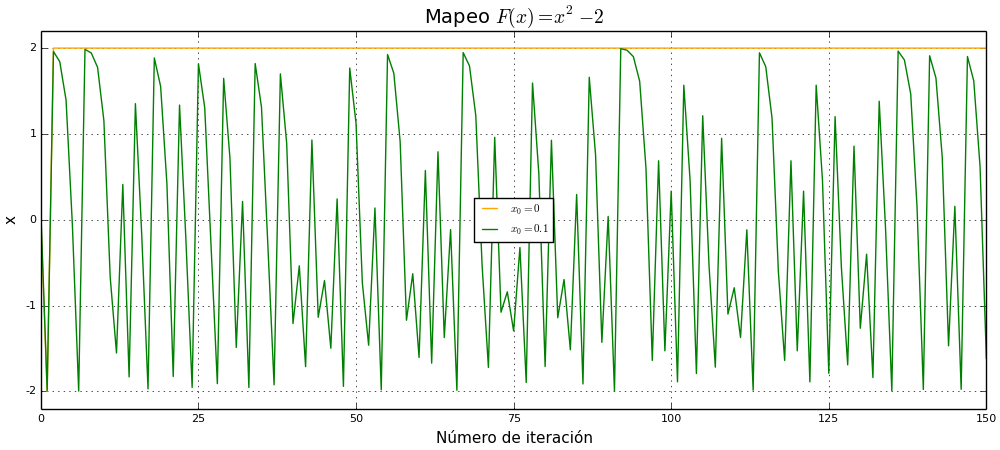

In [4]:
n_0, orbit_0 = iterator(F, 150, 0)
n_1, orbit_1 = iterator(F, 150, 0.1)
n_2, orbit_2 = iterator(F, 150,0.001 )

plot(n_0, orbit_0, ylim = (-2.2, 2.2), c="orange", label=(L"x_0 = 0"), title=(L"Mapeo $F(x)= x^2 -2$"),
xlabel=("Número de iteración"), ylabel=("x"), size=(1000,450))

#plot!(n_1, orbit_1, label=(L"x_0 = 0.1"), c="red")
plot!(n_1, orbit_1, label=(L"x_0 = 0.1"), c="green")


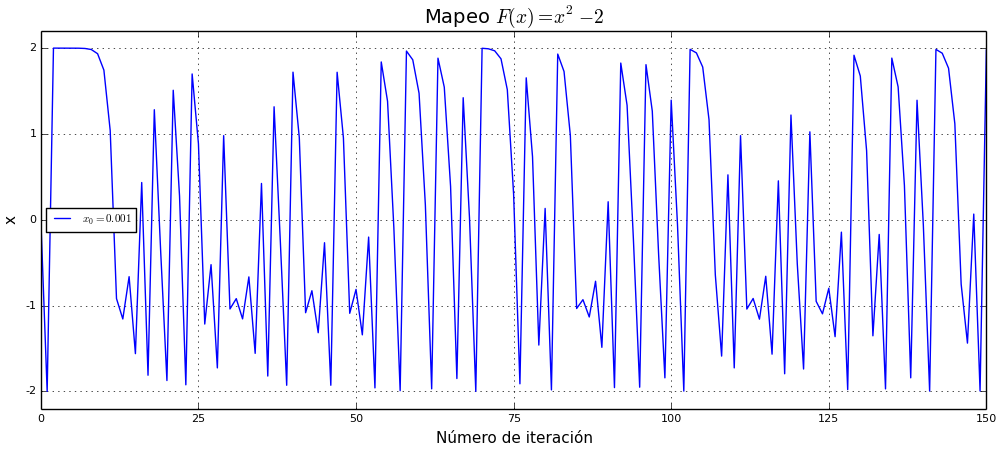

In [5]:
plot(n_2, orbit_2, ylim = (-2.2, 2.2), c="blue", label=(L"x_0 = 0.001"), title=(L"Mapeo $F(x)= x^2 -2$"),
xlabel=("Número de iteración"), ylabel=("x"), size=(1000,450))

**Respuesta:**
> Para la condición inicial $x_0 = 0$ se observa que la órbita se mapea a $2$.

> Para la condición inicial $x_0 = 0.1$, se observa que la orbita oscila, pero no se puede distinguir un patrón o un periodo.

> Para $x_0 = 0.001$ es lo mismo, para 150 iteraciones no hay un periodo  que se repita en la órbita.

------

### Ejercicio 2

Escriban una función que, con los argumentos `F` para el mapeo, `x0` para la condición inicial y `n` para el número de iterados del mapeo (un número entero), genere los `n` iterados del mapeo y haga el análisis gráfico descrito del mapeo. Ilustren el funcionamiento con $F(x)=\sqrt{x}$.

In [41]:
"""
    iteramapeo(f, x0, n)
    OUT: xx, fx

Esta función itera el mapeo `f`, usando como condición inicial `x0`, `n` veces
y regresa dos vectores que continen la secuencia de puntos, incluyendo las
*visitas* a la diagonal. Está función la definió Luis en clase.
"""

function iteramapeo(f, x0, n) #esto me lo robo de Luis.
    xx = [x0]
    fx = [0.0]
    for it = 1:n
        x1 = f(x0)
        push!(xx, x0)
        push!(fx, x1)
        x0 = x1
        push!(xx,x1)
        push!(fx,x1)
    end
    xx, fx
end

iteramapeo (generic function with 1 method)

In [7]:
"""
    cobweb_plot(f::Function, string_function::AbstractString, x0, rangex, n)

Función que hace el mapeo tipo cobweb o return map. f es la función que se quiere analizar, `string_function` es la 
función pero escrita en una cadena, `x0` es la condicón inicial, `rangex` es el rango del dominio donde se va a 
hacer el mapeo, y n es el número de iteraciones que se quiere hacer. 

"""

function cobweb_plot(f::Function, string_function::AbstractString, x0, rangex, n)

    xx, fx = iteramapeo(f, x0, n) #genera los puntos que se mapean.
    
    #Plotea la función por analizar.
    plot(rangex, f, xaxis=(L"x", (rangex[1], rangex[end])), yaxis=L"f(x)", label=(latexstring(string("f(x)=", 
            string_function))), size=(700, 450), title=(latexstring(string("f(x)=", string_function)))) 
    
    #hace la grafica de la función identidad.
    plot!(rangex, identity, label=(L"f(x) = x") )
    
    #hace la grafica del "camino" de las iteraciones.
    plot!(xx, fx, marker=(:dot, 3, 0.4), label=(latexstring(string("x_0=", x0))))

end

"""
    cobweb_plot!(f::Function, x0, n)

Función que agrega un `plot!` a `cobweb_plot`. No funciona sin haber hecho primero un `cobweb_plot` con los mismos
parámetros de que `cobweb_plot!`. E este caso ya no es necesario poner un rango, ni el string de la función, sólo la
función `f`, la condición inicial `x0` y `n` el número de iteraciones que van a hacer.
 
"""

function cobweb_plot!(f::Function, x0, n)

    xx, fx = iteramapeo(f, x0, n) #genera los puntos que se mapean.
    
    #agraga un mapeo a una función cobweb_plot.
    plot!(xx, fx, marker=(:dot, 3, 0.4), label=(label=(latexstring(string("x_0=", x0))))) 

end

cobweb_plot! (generic function with 1 method)

In [8]:
H(x) = sqrt(x) #Función para el ejercicio 2

H (generic function with 1 method)


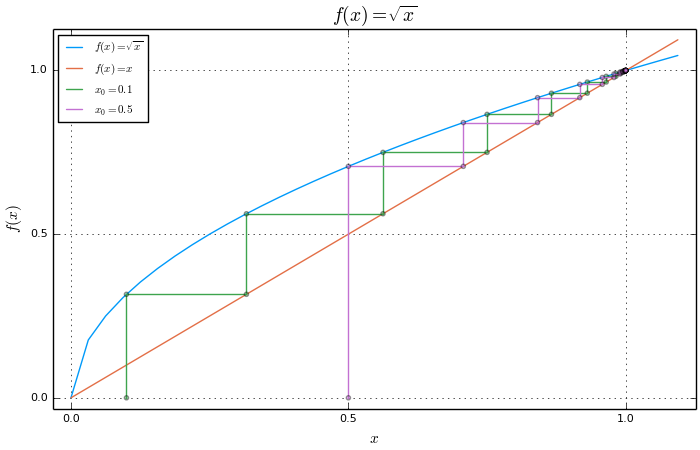

In [9]:
cobweb_plot(H, "\\sqrt{x}" , 0.1, 0:1/32:1.1, 15)
cobweb_plot!(H, 0.5, 15)

**Respuesta**

> La función $f(x) = \sqrt{x}$, tiene dos puntos fijos: $x^* = 0$ y $x^* = 1.0$ (son los puntos donde se intercepta la identidad con la raíz cuadrada de $x$). Se puede observar en el mapeo tipo `cobweb_plot` que el punto fijo estable es $x^*=1$ ya que las orbitas del mapeo tienden hacia este. En cambio, el punto fijo $x^* = 0$ es inestable.

------

### Ejercicio 3 

Usen el análisis para encontrar los puntos de periodo dos del mapeo $F(x) = x^2 -1.1$. 


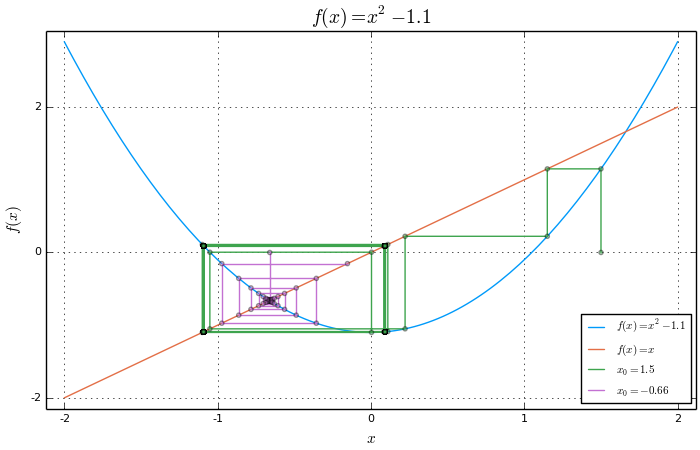

In [63]:
F(x) = x^2 - 1.1
cobweb_plot(F, "x^2 - 1.1", 1.5, -2:1/32:2, 1000)
#cobweb_plot!(F, -1.5, 10)
cobweb_plot!(F, -0.66, 20)

In [50]:
xx, fx = iteramapeo(F, 1.5, 30)
fx[end-3:end]

4-element Array{Float64,1}:
 -1.09161  
 -1.09161  
  0.0916083
  0.0916083

**Respuesta**

> Los puntos del periodo dos del mapeo $F(x) = x^2 -1.1$, son: $0.0916083$ y $-1.09161$. Las intersecciones de la curva $F(x) = x^2 -1.1$ con la identidad son los puntos fijos:

$$x^2 -1.1 = x,$$

$$\implies \ x^2 -x -1.1 = 0,$$

$$\implies \ x^*_{1,2} = \frac{1 \pm \sqrt{(-1)^2 - 4(-1.1)}}{2}.$$

In [66]:
xfix_1 = (1 + sqrt(1 + 4*1.1))/2
xfix_2 = (1 - sqrt(1 + 4*1.1))/2

xfix_1, xfix_2

(1.661895003862225,-0.6618950038622251)

> Los puntos fijos son: $x^*_1= 1.661895003862225$ y $x^*_2=-0.6618950038622251$. La estabilidad de los puntos fijos se detemina devivando la función y evaluando en el punto fijo. Si $|f'(x^*)| < 1$ es estable; si $|f'(x^*)| = 1$ es neutralmente atractivo o insteble.

In [79]:
using DualNumbers #Paquete que sirve para calcular las derivadas evaluadas en un punto de una función.

In [73]:
x_dual_1 = Dual(xfix_1, xfix_1)
x_dual_2 = Dual(xfix_2, xfix_2)

-0.6618950038622251 - 0.6618950038622251ɛ

In [80]:
abs(dualpart(F(x_dual_1))), abs(dualpart(F(x_dual_2))) #calculo el valor abs. de la parte dual, es decir la derivada.

(5.52379000772445,0.87620999227555)

> $x^*_1$: $|f'(x^*_1)| = 5.5238 > 1$, $\implies$ no es un punto estable.

> $x^*_2$: $|f'(x^*_2)| = 0.87621 < 1$, $\implies$ es un punto estable.

-------

### Ejercicio 4

Hagan un análisis completo de las posibles órbitas de los siguientes mapeos, usando distintos colores para distintas órbitas. Interesa entre otras cosas saber cuántos puntos fijos tiene y cómo es la dinámica cerca de ésos puntos.

1. $F_1(x) = \frac{1}{3x}$.

2. $F_2(x) = -\frac{x^5}{5}$.

3. $F_3(x) = \frac{x}{2}-2$.

#### 1. $F_1(x) = \frac{1}{3x}$. 


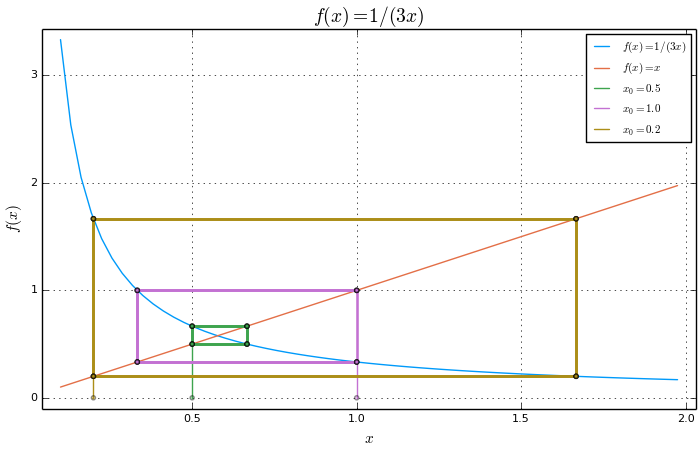

In [81]:
F1(x) = 1 / (3*x)
cobweb_plot(F1, "1 / (3x)", 0.5, 0.1:1/32:2, 10)
cobweb_plot!(F1, 1.0, 10)
cobweb_plot!(F1, 0.2, 10)


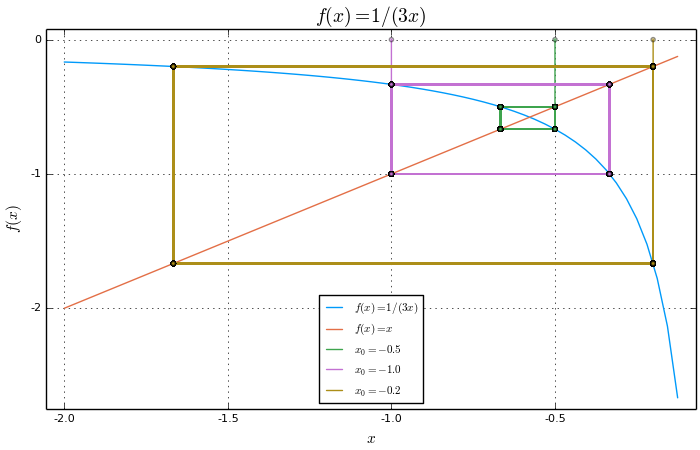

In [91]:
cobweb_plot(F1, "1 / (3x)", -0.5, -2:1/32:-0.1, 10000)
cobweb_plot!(F1, -1.0, 10000)
cobweb_plot!(F1, -0.2, 10000)

**Respuesta**
> Se puede apreciar en el análisis gráfico que los orbitas son preiodicas, de periodo 2. Estas órbitas son diferentes cuando las condiciones iniciales son distintas. Para 10 mil iterados (segundo cobweb plot), no se puede observar que las órbitas convergen a un punto u orbita.

> Igualando la función con la identidad, y resolviendo la ecuación se puede obtener los puntos fijos:

$$\frac{1}{3x} = x \ \implies \ x = \pm \sqrt{\frac{1}{3}}$$

In [84]:
xfix_1 = sqrt(1/3)
xfix_2 = -sqrt(1/3)

-0.5773502691896257

> $x^*_1 = \sqrt{\frac{1}{3}}$, $x^*_2 = -\sqrt{\frac{1}{3}}$, son los puntos fijos.

In [90]:
x_dual_1 = Dual(xfix_1, xfix_1)
x_dual_2 = Dual(xfix_2, xfix_2)

dxfix_1 = abs(dualpart(F1(x_dual_1)) )
dxfix_2 = abs(dualpart(F1(x_dual_2)) )

dxfix_1, dxfix_2

(0.5773502691896258,0.5773502691896258)

> $x^*_1$: $|f'(x^*_1)| = 0.577350 < 1$, $\implies$ es un punto estable.

> $x^*_2$: $|f'(x^*_2)| = 0.577350 < 1$, $\implies$ es un punto estable.

> Ambos puntos fijos son estables.

#### 2. $F_2(x) = -\frac{x^5}{5}$.

In [92]:
F2(x) = - x^5 / 5

F2 (generic function with 1 method)


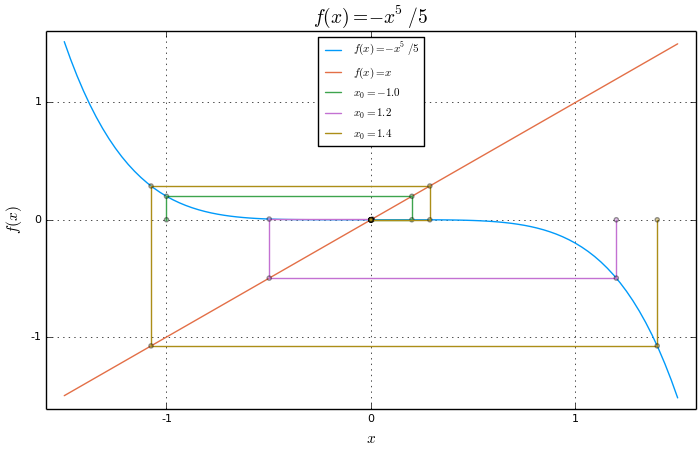

In [93]:
cobweb_plot(F2, "- x^5 / 5", -1.0, -1.5:1/32:1.5, 5)
cobweb_plot!(F2, 1.2, 5)
cobweb_plot!(F2, 1.4, 5)
#cobweb_plot!(F2, -1.3, 5)

**Respuesta**
> Se puede apreciar en el análisis gráfico que las orbitas convergen al punto fijo cero. Pero esto se tiene que comprobar analíticamente:

$$-\frac{x^5}{5} = x \ \implies \ x^4 = 0  \ \implies \ x = 0.$$

In [98]:
F2(0) # veo que el punto fijo se mapee en sí mismo.

0.0

In [100]:
abs(dualpart(F2(Dual(0,0)))) # calculo el valor abs. de la derivada evaluada en el punto fijo.

0.0

> Sólo hay un punto fijo $x^* = 0$, y es estable ya que: $|F_2(x^*)| = 0 < 1$.

#### 3. $F_3(x) = \frac{x}{2}-2$.


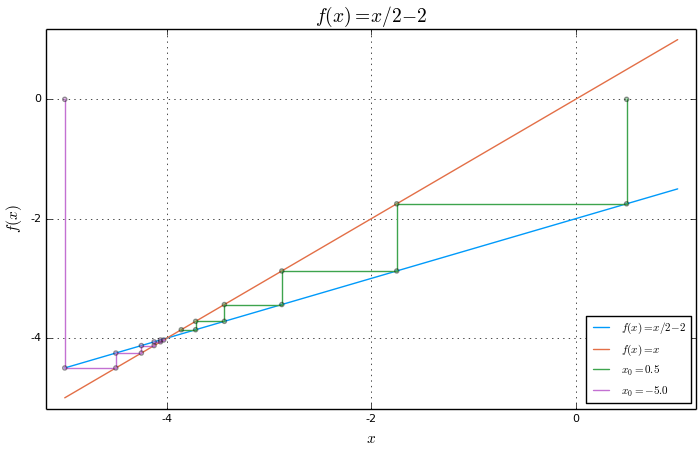

In [118]:
F3(x) = x/2 - 2
cobweb_plot(F3, "x/2 - 2", 0.5, -5:1/32:1, 5)
cobweb_plot!(F3, -5.0, 5)

**Respuesta**
> Se puede ver que sólo hay un punto fijo, y este es númerico. Se puede calcular analíticamente:

 $$\frac{x}{2}-2 = x \ \implies \ -\frac{x}{2} = 2 \ \implies \ x = -4$$
 
> El punto fijo es $x^* = -4$.

> $F'_3(x) = \frac{1}{2}$, esto implica que: $|F'_3(x^*)| = \frac{1}{2}$. $x^*$ es estable.

In [119]:
F3(-4) #se mapea a sí mismo, sí es punto fijo.

-4.0

-------

**Ejercicio 5:**

Para el mapeo mismo mapeo $F(x) = x^2-2$ en el intervalo $[-2,2]$
(ejercicio 1), consideren un punto al azar en el intervalo $[-2,2]$ y construyan una órbita muy larga, por ejemplo, de 20,000 iterados. Obtengan el histograma de frecuencia de visita de los puntos de la órbita. ¿Qué conclusión podemos sacar de este histograma?

In [103]:
F(x) = x^2 - 2  #Función que se pide iterar en el ejercicio

xi = 4*rand() - 2 #Esto genera un número al azar entre [-2,2] 

1.894500489209074

In [104]:
?iterator #Esto lo pongo para guiarme.

search: iterator Iterators Interpolations PositiveFactorizations isinteractive



```
iterator(f::Function, n::Int, x0)
OUT: pasos, orbitas
```

La función toma una función `f`, el número de pasos `n` y la condición inicial `x0`, e itera n veces la función comenzando por `x0`. Regresa un arreglo con los pasos y otro arreglo con las orbitas, resultado de iterarar la función n veces.


In [105]:
ns, orbita = iterator(F, 20000, xi)

([0,1,2,3,4,5,6,7,8,9  …  19991,19992,19993,19994,19995,19996,19997,19998,19999,20000],[1.8945,1.58913,0.525341,-1.72402,0.972235,-1.05476,-0.887482,-1.21238,-0.530144,-1.71895  …  -1.73669,1.01608,-0.967583,-1.06378,-0.868366,-1.24594,-0.44763,-1.79963,1.23866,-0.465727])


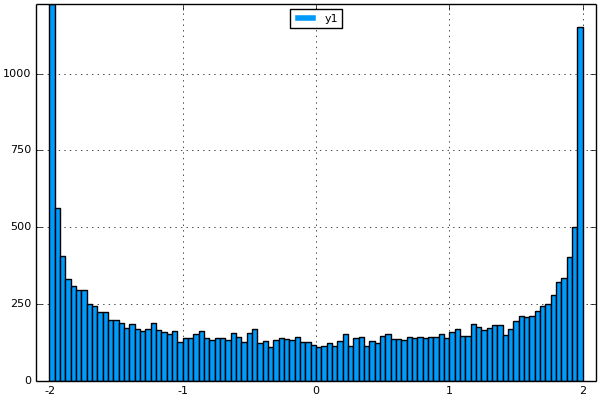

In [106]:
histogram(orbita,nbins=100, xlim=(-2.1,2.1))


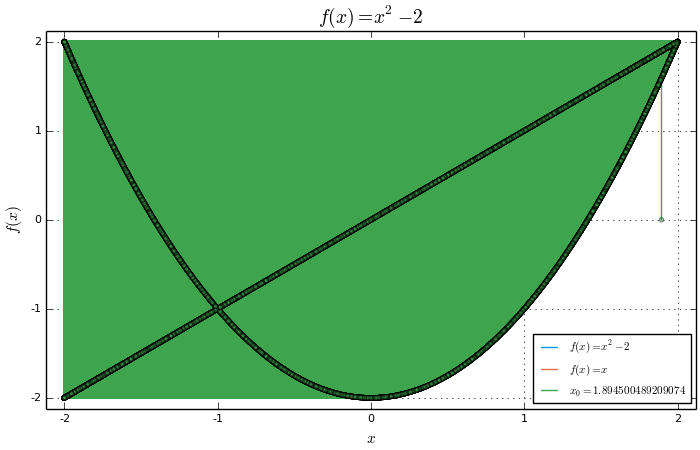

In [125]:
cobweb_plot(F, "x^2 -2", xi, -2:1/32:2, 10000)

**Respuesta**

> En el histograma, se aprecia que los puntos más visitados en el mapeo son $-2 \pm 0.04$ y $2 \pm 0.04$. Sin embargo, en el mapeo cobweb, para 10 mil iteraciones, no se puede apreciar que la orbita tenga un patrón que se repita. Por tanto, esta órbita es caótica.

-----

**Ejercicio 6:**

Analicen los mapeos

- F(x) = x^2,

- F(x) = x^3,

- F(x) = -x^3,

que se satisface $F(0) = F'(0) = 0$.

In [36]:
?cobweb_plot

search: cobweb_plot cobweb_plot!



```
cobweb_plot(f::Function, string_function::AbstractString, x0, rangex, n)
```

Función que hace el mapeo tipo cobweb o return map. f es la función que se quiere analizar, `string_function` es la  función pero escrita en una cadena, `x0` es la condicón inicial, `rangex` es el rango del dominio donde se va a  hacer el mapeo, y n es el número de iteraciones que se quiere hacer. 



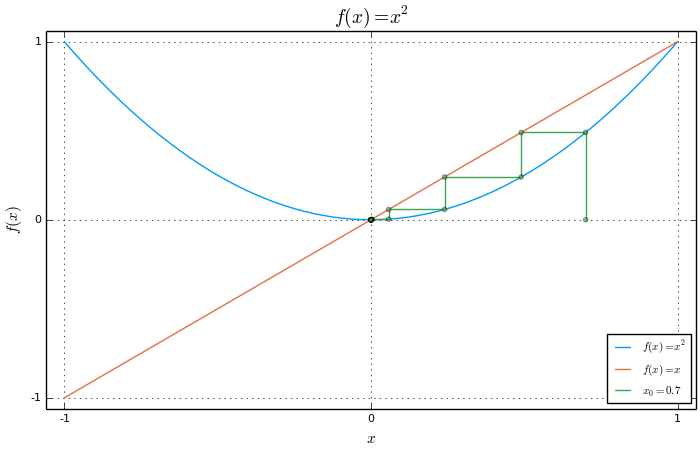

In [37]:
#Defino funcion
F1(x) = x^2

cobweb_plot(F1, "x^2", 0.7, -1:1/32:1, 10)



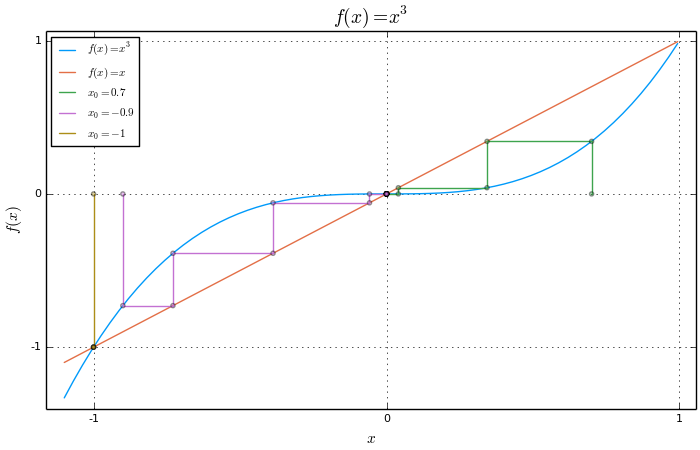

In [38]:
F2(x) = x^3

cobweb_plot(F2, "x^3", 0.7, -1.1:1/32:1, 10)
cobweb_plot!(F2, -0.9, 10)
cobweb_plot!(F2, -1, 2)


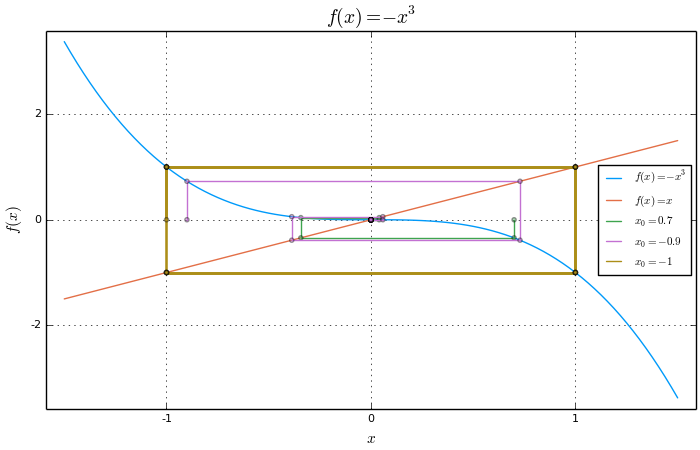

In [39]:
F3(x) = -x^3

cobweb_plot(F3, "-x^3", 0.7, -1.5:1/32:1.5, 10)
cobweb_plot!(F3, -0.9, 10)
cobweb_plot!(F3, -1, 10)
    

-------

**Ejercicio 7:**

Analicen los mapeos

- F(x) = x,

- F(x) = -x,

- F(x) = x-x^2,

que se satisface $F(0) = 0$ y $|F'(0)| = 1$. (Este tipo de puntos son *neutralmente* atractivos o repulsivos.

---

**Referencias:**

Robert L. Devaney, A First Course In Chaotic Dynamics: Theory and Experiment, 1992.

Heinz Georg Schuster, Wolfram Just, Deterministic Chaos, 2006.

